In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as wweb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
import talib as ta
warnings.filterwarnings('ignore')

nifty50 = pd.read_csv('nifty50list.csv')
nifty50

Company Name   
0                       Adani Enterprises Ltd.  \
1   Adani Ports and Special Economic Zone Ltd.   
2             Apollo Hospitals Enterprise Ltd.   
3                            Asian Paints Ltd.   
4                               Axis Bank Ltd.   
5                              Bajaj Auto Ltd.   
6                           Bajaj Finance Ltd.   
7                           Bajaj Finserv Ltd.   
8            Bharat Petroleum Corporation Ltd.   
9                           Bharti Airtel Ltd.   
10                   Britannia Industries Ltd.   
11                                  Cipla Ltd.   
12                             Coal India Ltd.   
13                    Divi's Laboratories Ltd.   
14               Dr. Reddy's Laboratories Ltd.   
15                          Eicher Motors Ltd.   
16                      Grasim Industries Ltd.   
17                       HCL Technologies Ltd.   
18                              HDFC Bank Ltd.   
19            HDFC Life Insurance Company Ltd.   
20                          Hero MotoCorp Ltd.   
21                    Hindalco Industries Ltd.   
22                     Hindustan Unilever Ltd.   
23                             ICICI Bank Ltd.   
24                                    ITC Ltd.   
25                          IndusInd Bank Ltd.   
26                                Infosys Ltd.   
27                              JSW Steel Ltd.   
28                    Kotak Mahindra Bank Ltd.   
29                            LTIMindtree Ltd.   
30                        Larsen & Toubro Ltd.   
31                    Mahindra & Mahindra Ltd.   
32                    Maruti Suzuki India Ltd.   
33                                   NTPC Ltd.   
34                           Nestle India Ltd.   
35          Oil & Natural Gas Corporation Ltd.   
36        Power Grid Corporation of India Ltd.   
37                    Reliance Industries Ltd.   
38             SBI Life Insurance Company Ltd.   
39                        Shriram Finance Ltd.   
40                         State Bank of India   
41          Sun Pharmaceutical Industries Ltd.   
42              Tata Consultancy Services Ltd.   
43                 Tata Consumer Products Ltd.   
44                            Tata Motors Ltd.   
45                             Tata Steel Ltd.   
46                          Tech Mahindra Ltd.   
47                          Titan Company Ltd.   
48                       UltraTech Cement Ltd.   
49                                  Wipro Ltd.   

                          Industry      Symbol Series     ISIN Code  
0                  Metals & Mining    ADANIENT     EQ  INE423A01024  
1                         Services  ADANIPORTS     EQ  INE742F01042  
2                       Healthcare  APOLLOHOSP     EQ  INE437A01024  
3                Consumer Durables  ASIANPAINT     EQ  INE021A01026  
4               Financial Services    AXISBANK     EQ  INE238A01034  
5   Automobile and Auto Components  BAJAJ-AUTO     EQ  INE917I01010  
6               Financial Services  BAJFINANCE     EQ  INE296A01024  
7               Financial Services  BAJAJFINSV     EQ  INE918I01026  
8       Oil Gas & Consumable Fuels        BPCL     EQ  INE029A01011  
9                Telecommunication  BHARTIARTL     EQ  INE397D01024  
10      Fast Moving Consumer Goods   BRITANNIA     EQ  INE216A01030  
11                      Healthcare       CIPLA     EQ  INE059A01026  
12      Oil Gas & Consumable Fuels   COALINDIA     EQ  INE522F01014  
13                      Healthcare    DIVISLAB     EQ  INE361B01024  
14                      Healthcare     DRREDDY     EQ  INE089A01023  
15  Automobile and Auto Components   EICHERMOT     EQ  INE066A01021  
16          Construction Materials      GRASIM     EQ  INE047A01021  
17          Information Technology     HCLTECH     EQ  INE860A01027  
18              Financial Services    HDFCBANK     EQ  INE040A01034  
19              Financial Services    HDFCLIFE     EQ  INE795G01014  
20  Automobil

In [11]:
# nifty50['Symbol'] = nifty50['Symbol'].str.replace('.', '-')
# symbol_list = nifty50['Symbol'].unique().tolist()

# # Add .NS to each symbol
# symbols_with_suffix = [symbol + '.NS' for symbol in symbol_list]
# # print(symbols_with_suffix)


list = ['Nifty 50']

end_date = '2023-05-10'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*2)


df = yf.download('', start_date, end_date)
# df = yf.download(tickers=list, interval = '1d',  start=start_date, end=end_date).stack()
df

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIFTY50^NSEI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [58]:
df.index.names = ['date', 'ticker']
df

Price                       Adj Close        Close         High          Low   
date       ticker                                                              
2013-05-02 ADANIENT.NS      29.359818    33.544247    34.180340    33.015446  \
           ADANIPORTS.NS   137.904053   146.300003   149.000000   144.149994   
           APOLLOHOSP.NS   789.625977   825.500000   847.950012   819.549988   
           ASIANPAINT.NS   435.075653   472.735016   474.989990   467.000000   
           AXISBANK.NS     286.811768   303.200012   305.750000   296.790009   
...                               ...          ...          ...          ...   
2023-04-28 TCS.NS         3164.308838  3219.250000  3227.250000  3196.250000   
           TECHM.NS        986.915283  1023.700012  1026.699951   981.049988   
           TITAN.NS       2633.318359  2641.850098  2679.300049  2619.500000   
           ULTRACEMCO.NS  7521.822266  7556.200195  7579.000000  7490.000000   
           WIPRO.NS        384.180664   385.000000   388.000000   380.000000   

Price                            Open      Volume  
date       ticker                                  
2013-05-02 ADANIENT.NS      33.107410   8041112.0  
           ADANIPORTS.NS   145.000000   1253183.0  
           APOLLOHOSP.NS   837.500000    418522.0  
           ASIANPAINT.NS   467.000000   1284490.0  
           AXISBANK.NS     297.019989  10775590.0  
...                               ...         ...  
2023-04-28 TCS.NS         3200.399902   2931312.0  
           TECHM.NS        981.950012   5146250.0  
           TITAN.NS       2672.449951   1567472.0  
           ULTRACEMCO.NS  7512.000000    457487.0  
           WIPRO.NS        380.000000  13854703.0  

[120250 rows x 6 columns]

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
# plt.style.use("fivethirdyeight")

#draw the plots immediately after the current cell
%matplotlib inline

#load seaborn's default theme and color palette to the session
sns.set()

#for reading stock data 
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from datetime import datetime

df = pd.read_csv("nifty_convert_data.csv")
df

In [2]:
df.set_index('datetime', inplace=True)
df

datetime      open      high       low     close
0  2023-07-03 09:15:00  44957.95  45034.60  44896.90  45005.20
1  2023-07-03 09:20:00  45010.40  45049.30  44994.40  45039.75
2  2023-07-03 09:25:00  45041.20  45054.55  45013.45  45045.90
3  2023-07-03 09:30:00  45043.30  45131.20  45029.10  45095.90
4  2023-07-03 09:35:00  45102.45  45158.60  45095.15  45140.75

In [25]:
data = df.filter(['close'])
dataset = data.values
training_data_len  = int(np.ceil(len(dataset)* .80))
training_data_len

7532

In [29]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset)

train_data = scaled_features[0:int(training_data_len), :]

som_grid_size = (10, 10)
som = MiniSom(som_grid_size[0], som_grid_size[1], train_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_features)
som.train_random(train_data, num_iteration=1000)


clustered_data = np.zeros(train_data.shape[0], dtype=int)

for i, x in enumerate(clustered_data):
    w = som.winner(x)
    clustered_data[i] = w[0] * som_grid_size[0] + w[1]


x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i,0])
    y_train.append(train_data[i,0])
    if i<=21:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00209121, 0.00729759, 0.00484583, 0.00441316, 0.00454296,
       0.00435548, 0.00239407, 0.00262482, 0.00670628, 0.00732643,
       0.00807638, 0.00878306, 0.01234532, 0.0113502 , 0.01123482,
       0.00875422, 0.00664859, 0.00638899, 0.00457181, 0.00281231])]
[0.005033315065331223]

[array([0.00209121, 0.00729759, 0.00484583, 0.00441316, 0.00454296,
       0.00435548, 0.00239407, 0.00262482, 0.00670628, 0.00732643,
       0.00807638, 0.00878306, 0.01234532, 0.0113502 , 0.01123482,
       0.00875422, 0.00664859, 0.00638899, 0.00457181, 0.00281231]), array([0.00729759, 0.00484583, 0.00441316, 0.00454296, 0.00435548,
       0.00239407, 0.00262482, 0.00670628, 0.00732643, 0.00807638,
       0.00878306, 0.01234532, 0.0113502 , 0.01123482, 0.00875422,
       0.00664859, 0.00638899, 0.00457181, 0.00281231, 0.00503332])]
[0.005033315065331223, 5.7688424816682016e-05]



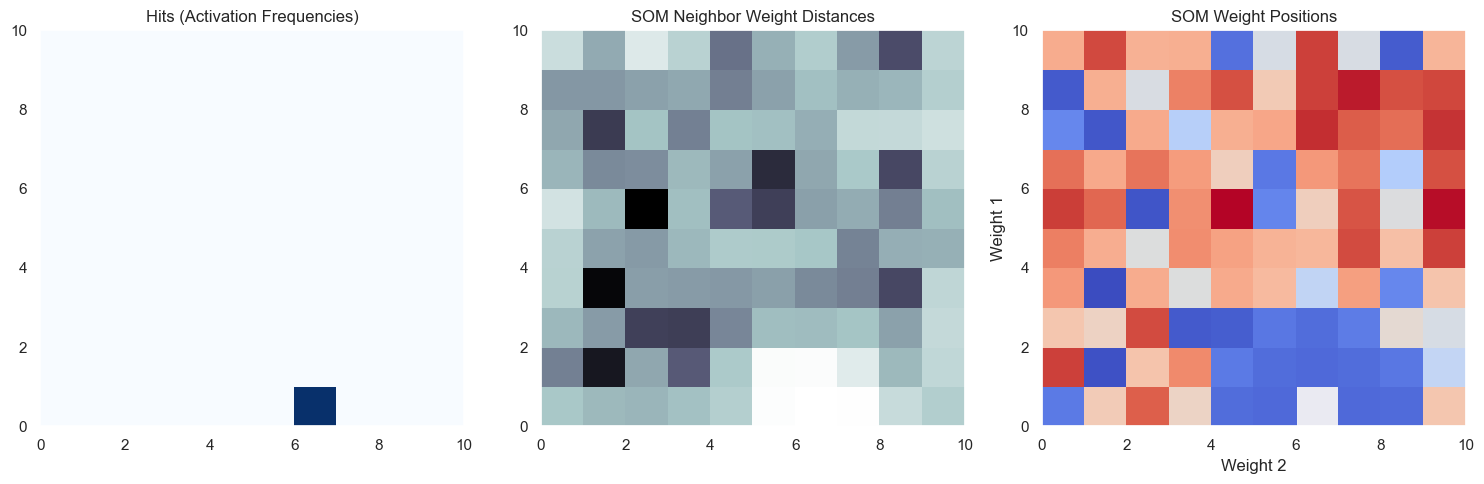

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolor(som.activation_response(scaled_features).T, cmap='Blues')
plt.colormaps()
plt.title('Hits (Activation Frequencies)')

plt.subplot(132)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colormaps()
plt.title('SOM Neighbor Weight Distances')


plt.subplot(133)
plt.pcolor(som.get_weights()[..., 0].T, cmap='coolwarm')
plt.colormaps()
plt.title('SOM Weight Positions')
plt.xlabel('Weight 2')
plt.ylabel('Weight 1')

plt.tight_layout()
plt.show()

In [37]:
input_layer  = tf.keras.Input(shape = (20,))
hidden1 = tf.keras.layers.Dense(30, activation = 'sigmoid')(input_layer)
hidden2 = tf.keras.layers.Dense(32, activation = 'sigmoid')(hidden1)
hidden3 = tf.keras.layers.Dense(1, activation = 'tanh')(hidden2)

output_layer = tf.keras.layers.Dense(1)(hidden3)

model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])

model.compile(optimizer='adam', loss='ms')

model.fit(x_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
235/235 [==============================] - 1s 937us/step - loss: nan
Epoch 2/100
235/235 [==============================] - 0s 975us/step - loss: nan
Epoch 3/100
235/235 [==============================] - 0s 934us/step - loss: nan
Epoch 4/100
235/235 [==============================] - 0s 932us/step - loss: nan
Epoch 5/100
235/235 [==============================] - 0s 976us/step - loss: nan
Epoch 6/100
235/235 [==============================] - 0s 953us/step - loss: nan
Epoch 7/100
235/235 [==============================] - 0s 975us/step - loss: nan
Epoch 8/100
235/235 [==============================] - 0s 877us/step - loss: nan
Epoch 9/100
235/235 [==============================] - 0s 909us/step - loss: nan
Epoch 10/100
235/235 [==============================] - 0s 990us/step - loss: nan
Epoch 11/100
235/235 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/100
235/235 [==============================] - 0s 996us/step - loss: nan
Epoch 13/100
235/235 [=====

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_4 (Dense)             (None, 30)                630       
                                                                 
 dense_5 (Dense)             (None, 32)                992       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 1657 (6.47 KB)
Trainable params: 1657 (6.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
from sklearn import metrics

test_data = scaled_features[training_data_len - 20:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20,len(test_data)):
    x_test.append(test_data[i-20:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


59/59 [==============================] - 0s 745us/step


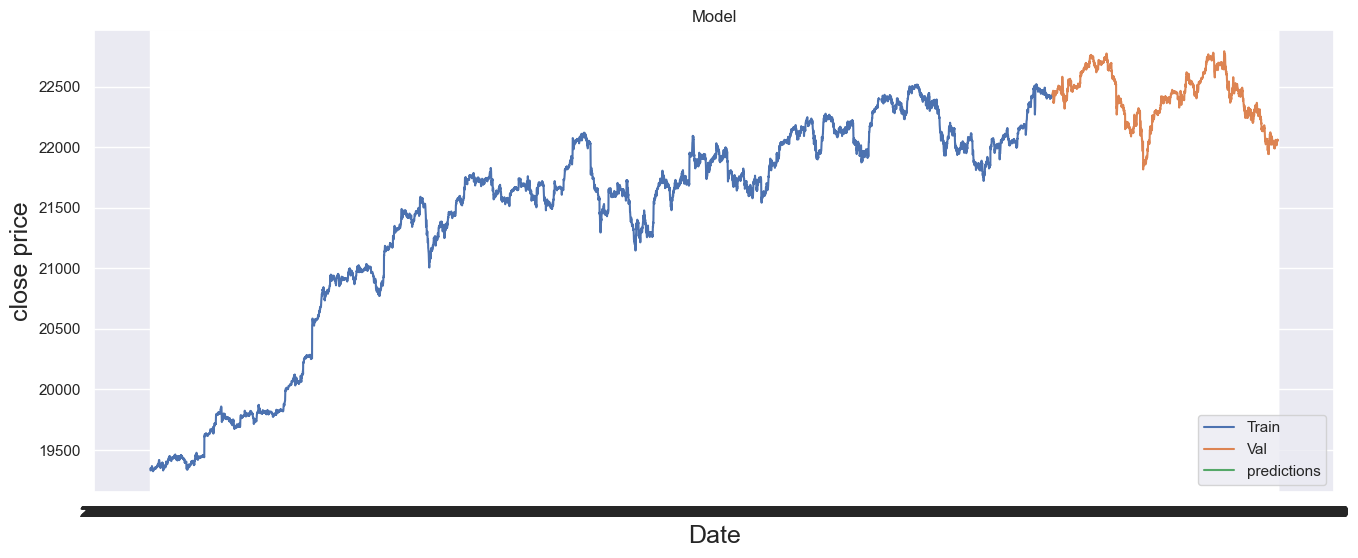

In [43]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()


In [44]:
valid

close  predictions
datetime                                  
2024-04-02 14:55:00  22433.25          NaN
2024-04-02 15:00:00  22444.00          NaN
2024-04-02 15:05:00  22443.70          NaN
2024-04-02 15:10:00  22452.30          NaN
2024-04-02 15:15:00  22461.90          NaN
...                       ...          ...
2024-05-10 15:05:00  22060.05          NaN
2024-05-10 15:10:00  22054.60          NaN
2024-05-10 15:15:00  22061.95          NaN
2024-05-10 15:20:00  22060.40          NaN
2024-05-10 15:25:00  22054.00          NaN

[1882 rows x 2 columns]